In [1]:
import scanpy as sc
import umap as umap

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()    ##output an overview of the software versions that are loaded
sc.settings.set_figure_params(dpi=80, facecolor='white')  #dpi : int (default: 80) Resolution of rendered figures – this influences the size of figures in notebooks.

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.8 pynndescent==0.5.10


In [3]:
adata = sc.read_h5ad('/Users/vishruthdinesh/Downloads/Squirrel_PR.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 1022 × 25201
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'orig.file', 'RNA_snn_res.0.5', 'seurat_clusters', 'dendro_order', 'cell_class', 'integrated_snn_res.0.5', 'type'
    var: 'features'
    obsm: 'X_tsne', 'X_umap'

In [5]:
#Taking transpose of data, because cells & genes are flipped
#adata = adata.T

In [6]:
#Viewing Cells
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,orig.file,RNA_snn_res.0.5,seurat_clusters,dendro_order,cell_class,integrated_snn_res.0.5,type
possorted_genome_bam_763VB:AAACGAAAGAGCAACCx,possorted_genome_bam_763VB,2343.0,1580,SquirrelChx10pos,2,0,2,Cone,0,MW_cone
possorted_genome_bam_763VB:AAAGGTATCACCCTTGx,possorted_genome_bam_763VB,5145.0,2538,SquirrelChx10pos,2,0,2,Cone,1,MW_cone
possorted_genome_bam_763VB:AAACCCAAGGTGTGACx,possorted_genome_bam_763VB,2472.0,1635,SquirrelChx10pos,2,0,2,Cone,0,MW_cone
possorted_genome_bam_763VB:AAAGGATCAAGCTGCCx,possorted_genome_bam_763VB,2620.0,1621,SquirrelChx10pos,2,0,2,Cone,0,MW_cone
possorted_genome_bam_763VB:AAAGAACAGTGATGGCx,possorted_genome_bam_763VB,2652.0,1618,SquirrelChx10pos,2,0,2,Cone,2,MW_cone
...,...,...,...,...,...,...,...,...,...,...
possorted_genome_bam_GB1A8:TTACTGTTCTGTCGTCx,possorted_genome_bam_GB1A8,1292.0,940,SquirrelNeuNpos,2,0,2,Cone,0,MW_cone
possorted_genome_bam_GB1A8:TTATTGCTCCGAAATCx,possorted_genome_bam_GB1A8,2945.0,1806,SquirrelNeuNpos,2,0,2,Cone,1,MW_cone
possorted_genome_bam_GB1A8:TTGCGTCAGGGCGAAGx,possorted_genome_bam_GB1A8,1451.0,1081,SquirrelNeuNpos,2,0,2,Cone,0,MW_cone
possorted_genome_bam_GB1A8:TTTACCAGTTGTAGCTx,possorted_genome_bam_GB1A8,1779.0,1258,SquirrelNeuNpos,2,0,2,Cone,0,MW_cone


In [7]:
#Viewing Genes
adata.var

,features
ENSSTOG00000029755,ENSSTOG00000029755
ENSSTOG00000031963,ENSSTOG00000031963
ENSSTOG00000029748,ENSSTOG00000029748
ENSSTOG00000034867,ENSSTOG00000034867
ENSSTOG00000027459,ENSSTOG00000027459
...,...
ENSSTOG00000031134,ENSSTOG00000031134
ENSSTOG00000032329,ENSSTOG00000032329
MT-ND5,MT-ND5
MT-CYB,MT-CYB


In [8]:
#Removing gene doublets
adata.var_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


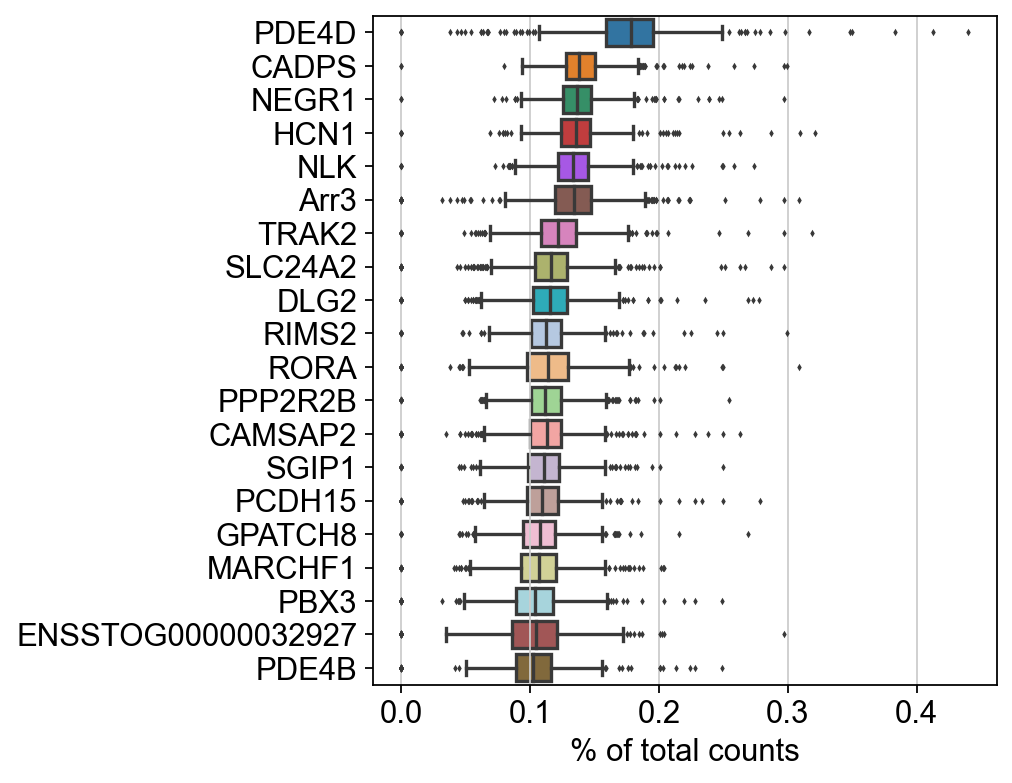

filtered out 12291 genes that are detected in less than 3 cells


In [9]:
sc.pl.highest_expr_genes(adata, n_top = 20)
sc.pp.filter_genes(adata, min_cells = 3)
sc.pp.filter_cells(adata, min_genes = 200)
#1225 genes removed

In [10]:
adata.var['mt']= adata.var_names.str.startswith('MT-')
#qc_metrics creates columns in var and obs that are indicative of the quality of cells. One such metric is no. of mt cells.
#Generating these columns can help in removing outliers
sc.pp.calculate_qc_metrics(adata, qc_vars =['mt'], percent_top=None, log1p=False, inplace=True)

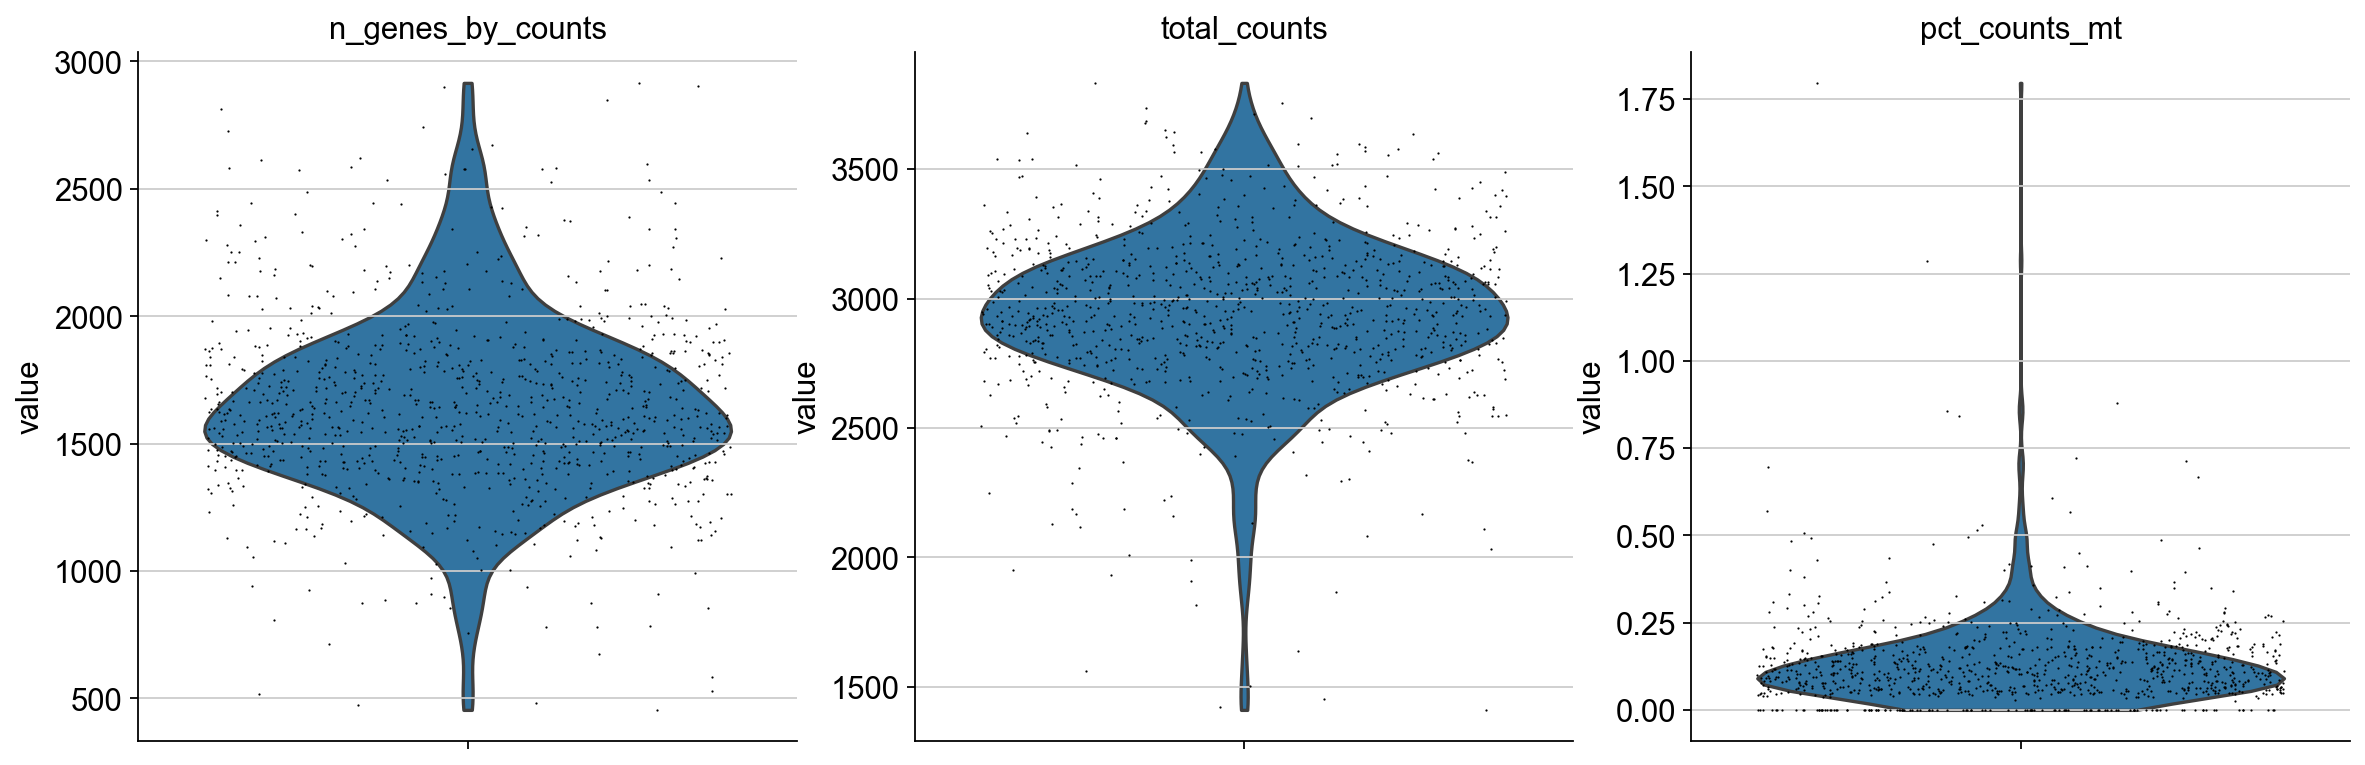

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

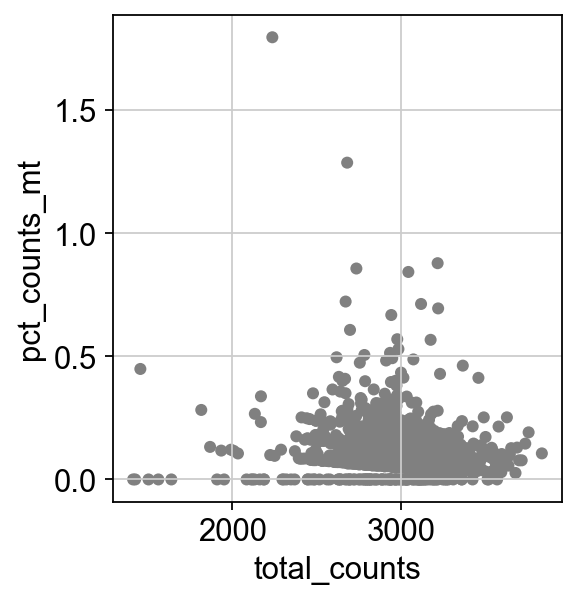

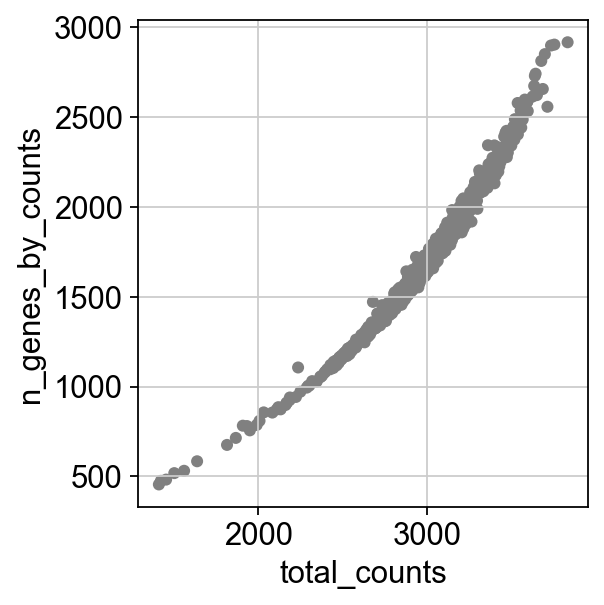

In [12]:
sc.pl.scatter(adata, x = 'total_counts', y = 'pct_counts_mt')
sc.pl.scatter(adata, x = 'total_counts', y = 'n_genes_by_counts')

In [13]:
#Removing outliers
adata = adata[adata.obs.n_genes_by_counts <2500,:]
adata = adata[adata.obs.pct_counts_mt <5, :]

In [14]:
adata

View of AnnData object with n_obs × n_vars = 999 × 12910
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'orig.file', 'RNA_snn_res.0.5', 'seurat_clusters', 'dendro_order', 'cell_class', 'integrated_snn_res.0.5', 'type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'features', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_tsne', 'X_umap'

In [15]:
#Divides the total counts of a cell by target_sum to obtain a scaling factor. Each gene in each cell is multiplied by this scaling factor
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/Users/vishruthdinesh/anaconda3/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
sc.pp.log1p(adata)
adata.raw = adata

In [17]:
#All factors below are at standard level. This function annotates highly variable genes    
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [18]:
sum(adata.var.highly_variable)

2875

In [19]:
#Regressing out unwatned sources of variation 
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:07)


In [20]:
#Values exceeding standard deviation 10 are removed
sc.pp.scale(adata, max_value=10)

In [21]:
#Running PCA on data
sc.tl.pca(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


/Users/vishruthdinesh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


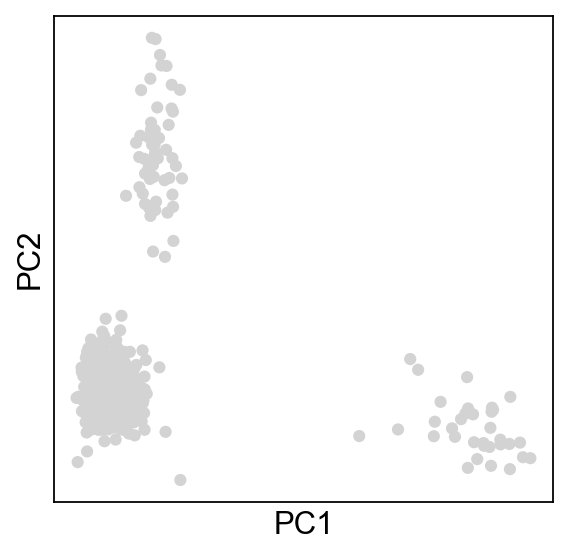

In [22]:
#Plotting PCA graph
sc.pl.pca(adata)

In [23]:
#Viewing highest variable genes in PC1
pc1_loadings = adata.varm['PCs'][:, 0]  
#Top and Bottom 10 Variable Genes per PC
import numpy as np
sorted_genes = adata.var_names[np.argsort(pc1_loadings)[::-1]]
top_genes = sorted_genes[:-10]
top_genes


Index(['PDE6B', 'PDE6A', 'RHO', 'CNGA1', 'GNGT1', 'NRL', 'SLC24A1', 'ESRRB',
       'ENSSTOG00000033101', 'GRK1',
       ...
       'TLE1', 'ENSSTOG00000034345', 'SOX5', 'ENSSTOG00000034866', 'SDC2',
       'PPEF1', 'TMEM178B', 'MCC', 'PCDHAC2', 'G0S2'],
      dtype='object', length=12900)

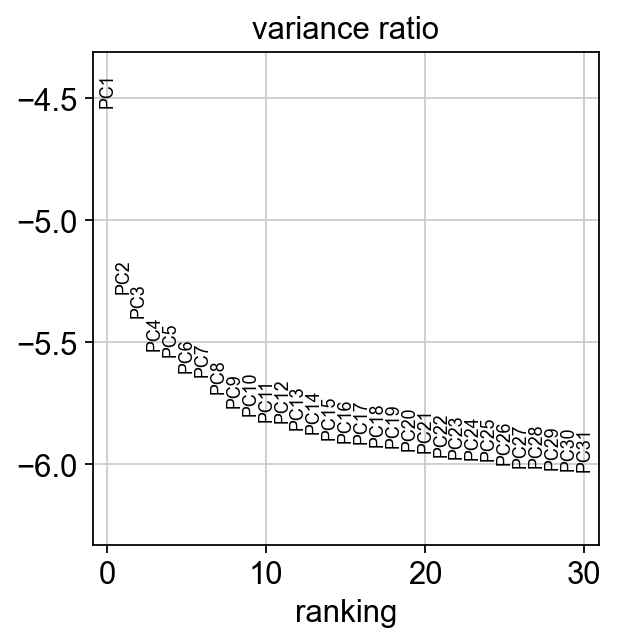

In [24]:
#This gives us information about how many PCs we should consider in order to compute the neighborhood relations (n_components?)of cells
sc.pl.pca_variance_ratio(adata, log=True)
#Seems like PC8 is the elbow

In [25]:
#Finding the neighbor graph using 10 PCs and with each datapoint having a max of 5 neighbors
sc.pp.neighbors(adata, n_neighbors =5, n_pcs = 10)

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [26]:
# Access the gene expression matrix
gene_expression_matrix = adata.X

X = gene_expression_matrix

In [27]:
# Extract the last 15 characters (batch IDs) from the cell names
batch_ids = [cell_name[21:26] for cell_name in adata.obs.index]
adata.obs['batch'] = batch_ids
#sc.pl.umap(adata, color = ['batch'])

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


/Users/vishruthdinesh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


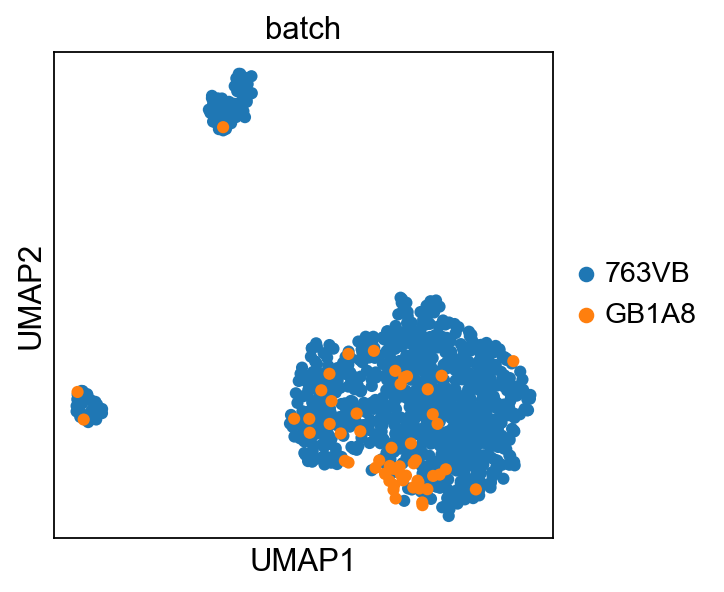

In [28]:
sc.tl.umap(adata, random_state = 0)
sc.pl.umap(adata, color = ['batch'])

running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


/Users/vishruthdinesh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/vishruthdinesh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


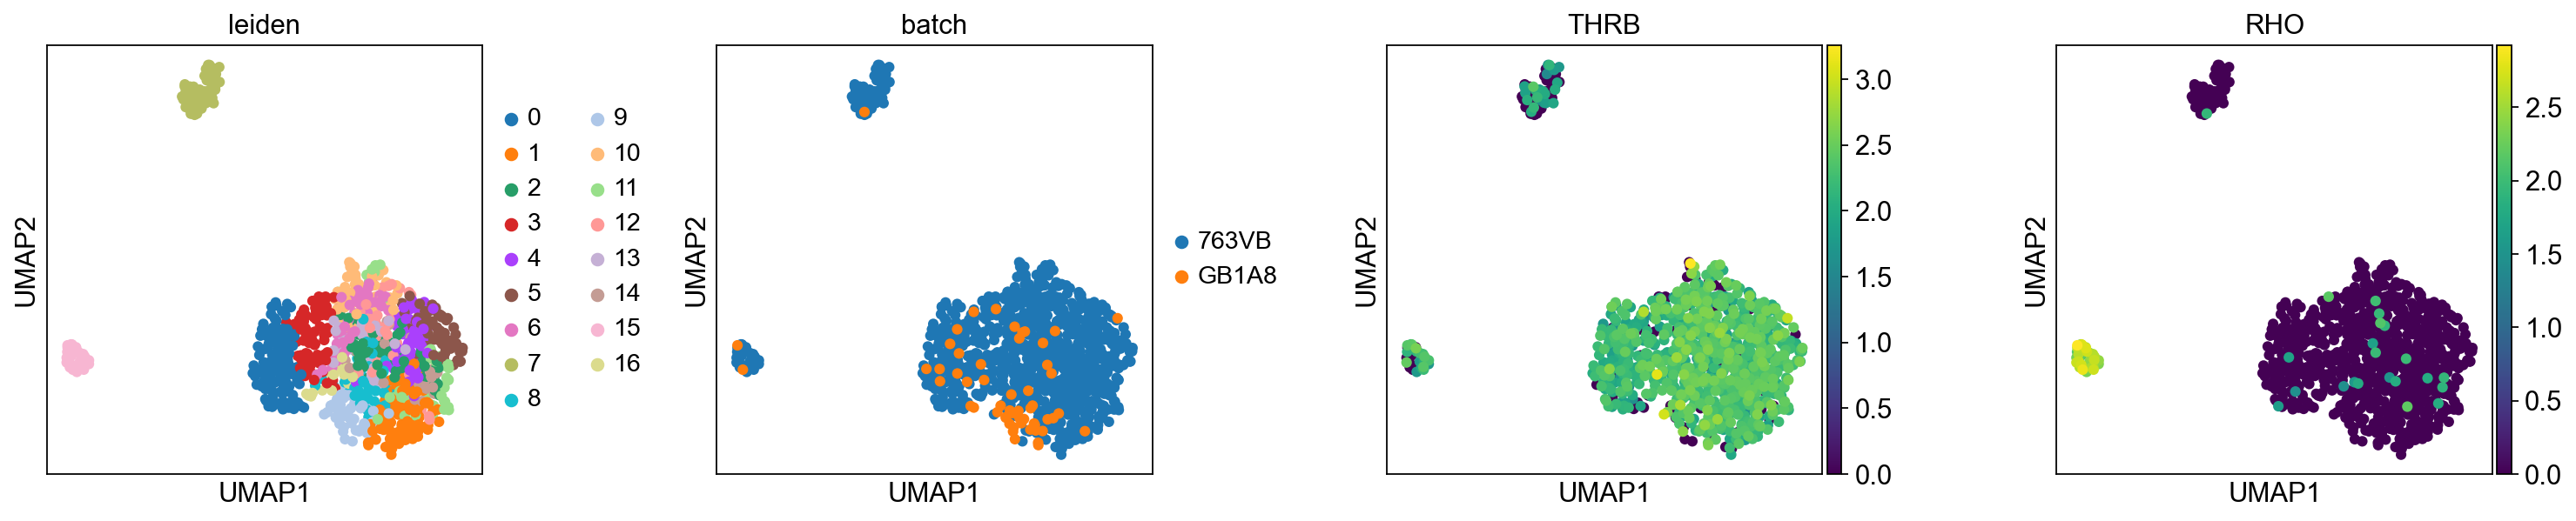

In [30]:
#Running Leiden clustering algorithm
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['leiden', 'batch', 'THRB', 'RHO'], wspace = 0.4)

In [31]:
#Mapping custers: Leiden cluster to cell type 
cluster_mapping = {'0': 'L/M-cone', '1': 'L/M-cone', '2': 'L/M-cone', '3':"L/M-cone", '4': 'L/M-cone', '5': "L/M-cone", 
                   '6': 'L/M-cone', '7': 'S-cone', '8': "L/M-cone", '9': "L/M-cone", "10": "L/M-cone", '11': 'L/M-cone', 
                   '12': "L/M-cone", '13': 'L/M-cone', '14': "L/M-cone", '15': "Rod", '16': "L/M-cone"} 
adata.obs['leiden_duplicate'] = adata.obs['leiden']
adata.obs['leiden_duplicate'] = adata.obs['leiden_duplicate'].map(cluster_mapping)

/Users/vishruthdinesh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


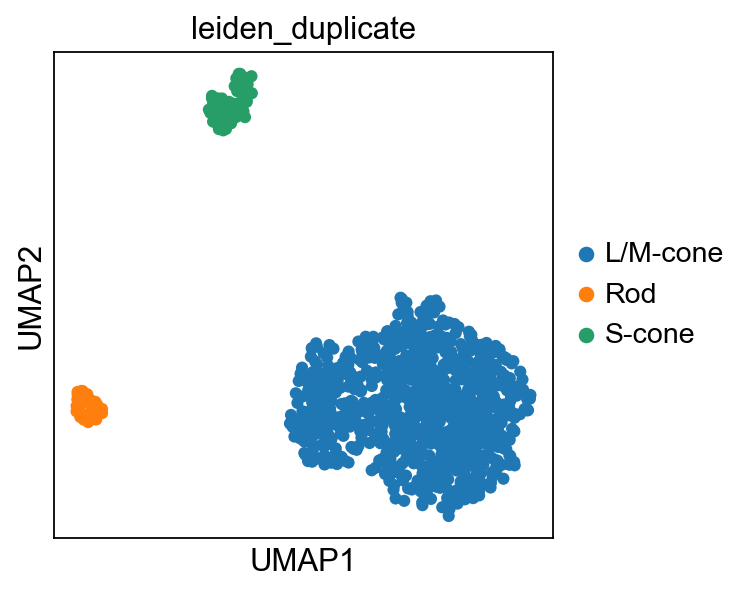

In [32]:
sc.pl.umap(adata, color= "leiden_duplicate")

In [33]:
#Seeing distribution of batches in leiden clusters
batch = adata.obs["batch"].values
column = adata.obs["leiden"].values

import pandas as pd
cross_tab2 =  pd.crosstab(column, batch)
confusion_percent2 = cross_tab2.apply(lambda x: x / x.sum() * 100, axis=0)
df2 = pd.DataFrame(confusion_percent2)

import pandas as pd

df_row_normalized = df2.copy()

# Divide each row by the row sum and then multiply by 100
df_row_normalized = df_row_normalized.div(df_row_normalized.sum(axis=1), axis=0) * 100

df_row_normalized

col_0,763VB,GB1A8
row_0,,
0,41.746375,58.253625
1,55.260664,44.739336
2,69.974555,30.025445
3,51.533821,48.466179
4,100.000000,0.000000
5,78.589249,21.410751
6,44.026090,55.973910
7,76.215671,23.784329
8,59.292799,40.707201


In [ ]:
#Ranking highly variable genes based on celltype
sc.tl.rank_genes_groups(adata, 'leiden_duplicate', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
#Generating a dendrogram based on leiden clusters
sc.tl.dendrogram(adata, groupby=['leiden'], cor_method='pearson', use_rep='X_pca')
sc.pl.dendrogram(adata, groupby = ['leiden'])

In [ ]:
#Viewing expression of more clusters through dotplots
sub_rod = ['RHO','GNAT2', 'OPN1SW', 'PRDM1', 'THRB', 'GNAT1', ]
sc.pl.dotplot(adata, sub_rod, groupby = ['leiden'])

In [ ]:
#Viewing expression of markers on UMAP
sc.pl.umap(adata, color = ['leiden',  'batch','RHO','THRB', 'CCDC136'], wspace = 0.4, frameon=False)

In [ ]:
#Integration not required
'''import scanpy.external as sce
sce.pp.harmony_integrate(adata, key='batch')'''

In [ ]:
'''sc.pp.pca(adata)
sc.pp.neighbors(adata, use_rep='X_pca_harmony', n_neighbors =5, n_pcs = 10)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['batch', 'leiden', 'leiden_duplicate'], wspace = 0.5)
'X_pca_harmony' in adata.obsm'''

In [34]:
#Writing the normalized and logarithmized raw gene expression data into an h5ad file. Data is not scaled or regressed out. 
adata.raw.to_adata().write('/Users/vishruthdinesh/Downloads/Squirrel_PR_clean.h5ad')